Assignment 4\
Khalid Saifullah\
ID: A20423546\
\
Solution to question 1(b, c, d)

In [1]:
# Importing the libraries
import sys
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import optimizers
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

import random
random.seed(0)

In [2]:
# preparing the training and validation dataset
def prepare_data():
    # creating the data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    # preparing the iterators
    train_gen = datagen.flow_from_directory('Dataset/train/', class_mode='binary', batch_size=60, target_size=(200, 200))
    validation_gen = datagen.flow_from_directory('Dataset/validation/', class_mode='binary', batch_size=60, target_size=(200, 200))
    test_gen = datagen.flow_from_directory('Dataset/test/', class_mode='binary', batch_size=60, target_size=(200, 200))
    return train_gen, validation_gen, test_gen

# defining the CNN model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    # compiling the model
    # opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    # model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plotting the learning curves
def learning_curves(history):
    # plotting the loss
    print(history.history.keys())
    epochs = range(1, len(history.history['accuracy'])+1)
    plt.figure(figsize=(10,12), facecolor='w')
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
    plt.plot(epochs, history.history['val_loss'], 'r', label='Validation loss')
    plt.legend()
    # plotting the accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(epochs, history.history['accuracy'], 'bo', label='Training accuracy')
    plt.plot(epochs, history.history['val_accuracy'], 'r', label='Validation accuracy')
    plt.legend()
    # saving the plot file
    plt.show()
    plt.savefig('diagnostic_plot.png')
    plt.close()

# defining the run_model
def run_model():
    # defining the model
    model = define_model()
    # loading the prepared data
    train_generator, validation_generator, test_generator = prepare_data()
    # fitting the model
    history = model.fit_generator(train_generator, steps_per_epoch=len(train_generator), validation_data=validation_generator, validation_steps=len(validation_generator), epochs=150, verbose=0)
    # learning curves
    learning_curves(history)
    model.save('cats&dogs_1bcd.h5')



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 98, 98, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)       1

/Applications/Anaconda/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


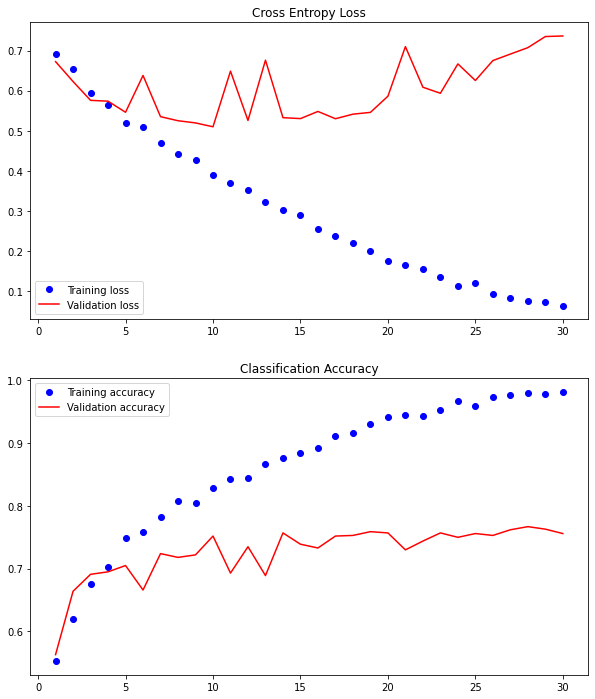

In [3]:
# Run model
run_model()

In [6]:
# Evaluating the final model on the test set
train_generator, validation_generator, test_generator = prepare_data()
model = load_model('cats&dogs_1bcd.h5')
# model evaluation
_, acc = model.evaluate_generator(test_generator, steps=len(test_generator), verbose=0)
print('>> %.3f' % (acc * 100.0))

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
>> 77.550
